In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = 'Ad revenue.xlsx'
df = pd.read_excel(file_path)

df.head()

In [2]:
# в столбце user_id есть пропуска, удаляем их

df.replace(['', 'None', 'N/A', 'n/a', 'Undefined'], pd.NA, inplace=True)

In [3]:
df.isna().sum()

install_date        0
event_date          0
event_revenue       0
user_id          1180
dtype: int64

In [4]:
df_clean = df.dropna()

In [5]:
df_clean.isna().sum()

install_date     0
event_date       0
event_revenue    0
user_id          0
dtype: int64

In [6]:
print("\nРазмер исходных данных:", df.shape)
print("Размер данных без пропусков:", df_clean.shape)


Размер исходных данных: (89574, 4)
Размер данных без пропусков: (88394, 4)


In [7]:
# Найдём выбросы в столбце event_revenue

Q1 = df_clean['event_revenue'].quantile(0.25)
Q3 = df_clean['event_revenue'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_clean[(df_clean['event_revenue'] >= lower_bound) & (df_clean['event_revenue'] <= upper_bound)]

print("\nРазмер исходных данных:", df.shape)
print("Размер данных без пропусков:", df_clean.shape)
print("Размер данных без выбросов и пропусков:", df_no_outliers.shape)


Размер исходных данных: (89574, 4)
Размер данных без пропусков: (88394, 4)
Размер данных без выбросов и пропусков: (80234, 4)


In [8]:
df_no_outliers.head()

,install_date,event_date,event_revenue,user_id
1,2024-09-01,2024-09-01,0.025017,c1680ba0-5b74-408d-a573-06ca1ad3f502
2,2024-09-01,2024-09-01,0.047368,5f80f606-a748-43ff-9356-88ca9b41cbd3
3,2024-09-01,2024-09-01,0.053080,3b592e6d-f35a-4715-9cf3-9b7a63336c24
4,2024-09-01,2024-09-01,0.023026,c1680ba0-5b74-408d-a573-06ca1ad3f502
6,2024-09-01,2024-09-01,0.052744,c49048ff-d12a-4fbe-b9f7-129f4b6f9eb0


In [10]:
# Изменяем формат даты
df_no_outliers['event_date'] = df_no_outliers['event_date'].dt.strftime('%Y-%m-%d')

C:\Temp\ipykernel_5488\1222768150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['event_date'] = df_no_outliers['event_date'].dt.strftime('%Y-%m-%d')


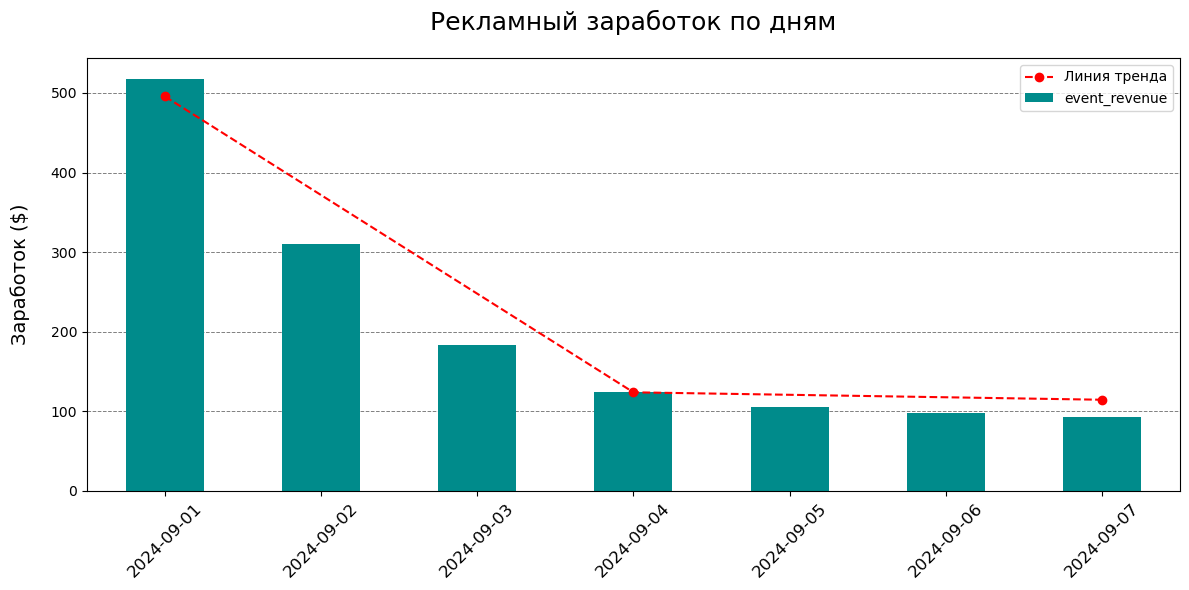

In [11]:
# Группировка по дате события и суммирование заработка
revenue_per_day = df_no_outliers.groupby('event_date')['event_revenue'].sum()

# Построение графика
plt.figure(figsize=(12, 6))
revenue_per_day.plot(
    kind='bar', 
    color='darkcyan',  # Применен приятный темно-голубой цвет
    zorder=2.5
)

# Настройки заголовка и подписей осей
plt.title("Рекламный заработок по дням", fontsize=18, pad=20)
plt.xlabel('')
plt.ylabel("Заработок ($)", fontsize=14, labelpad=15)

# Получение данных
x = np.arange(len(revenue_per_day))
y = revenue_per_day.values

# Линия тренда (полином второй степени)
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x[::3], p(x)[::3], "r--", marker='o', zorder=3.0, label='Линия тренда')  # Сделали линию пунктирной

# Угол и шрифт для подписи оси X
plt.xticks(rotation=45, fontsize=12)

# Получение текущих значений на оси Y
yticks = plt.gca().get_yticks()

# Сетка и дополнительные настройки
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', zorder=0.5)  # Легкая пунктирная сетка

# Оптимизация расположения элементов
plt.tight_layout()
plt.legend()

# Отображение графика
plt.show()

